In [1]:
import json
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
def count_words(word):
    word_list = word.split()
    return len(word_list)

def count_characters(word):
    return len(word)

In [3]:
search_engines = [
    { 'name': 'google', 'category': 'web' },
    { 'name': 'neeva', 'category': 'web' },
    { 'name': 'bing', 'category': 'web' },
    { 'name': 'duckduckgo', 'category': 'web' },
    { 'name': 'yahoo', 'category': 'web' },
    { 'name': 'amazon', 'category': 'ecom' },
    { 'name': 'ebay', 'category': 'ecom' },
    { 'name': 'etsy', 'category': 'ecom' },
    { 'name': 'target', 'category': 'ecom' }
]

fmt_results = [];

for row in search_engines:
    results_path = './../cypress/fixtures/' + row['name'] + "-output.json"
    f = open(results_path, "r")
    results = json.load(f)
    
    for query in results:
        for suggestion in query['results']:                    
            fmt_suggestion = {
                'search_engine': row['name'],
                'category': row['category'],
                'query': query['query'],
                'text': suggestion['text'],
                'index': suggestion['index'],
                'height': suggestion['height'],
                'num_suggestions': len(query['results']),
                'num_words': count_words(suggestion['text']),
                'num_characters': count_characters(suggestion['text']),
            }
            fmt_results.append(fmt_suggestion);
            

df = pd.DataFrame(fmt_results)            

In [4]:
df.groupby(['search_engine'])['num_suggestions'].describe()

,count,mean,std,min,25%,50%,75%,max
search_engine,,,,,,,,
amazon,450.0,11.488889,3.290820,1.0,10.0,11.0,11.0,23.0
bing,363.0,7.578512,0.880282,3.0,7.0,8.0,8.0,8.0
duckduckgo,392.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
ebay,322.0,11.043478,2.653036,1.0,11.0,12.0,12.0,13.0
etsy,374.0,11.278075,2.133029,2.0,12.0,12.0,12.0,12.0
google,490.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
neeva,241.0,4.983402,0.257663,1.0,5.0,5.0,5.0,5.0
target,257.0,9.007782,2.484314,1.0,10.0,10.0,10.0,10.0
yahoo,485.0,9.907216,0.290428,9.0,10.0,10.0,10.0,10.0


---
# How queries were analyzed per search engine?

In [11]:
df['query'].count()

3374

---
# How many suggestions should be shown?
For all of the given test queries, what is the avg number of suggestions shown by each search engine?

In [30]:
df['num_suggestions'].agg(['mean'])

mean    9.499704
Name: num_suggestions, dtype: float64

In [32]:
df.groupby(['category'])['num_suggestions'].agg(['mean'])

,mean
category,
ecom,10.875980
web,8.520041


In [13]:
avg_num_suggestions = df.groupby(['search_engine'])['num_suggestions'].agg(['mean']).sort_values('mean')
avg_num_suggestions

,mean
search_engine,
neeva,4.983402
bing,7.578512
duckduckgo,8.000000
target,9.007782
yahoo,9.907216
google,10.000000
ebay,11.043478
etsy,11.278075
amazon,11.488889


<AxesSubplot:title={'center':'Number of suggestions shown'}, xlabel='search_engine'>

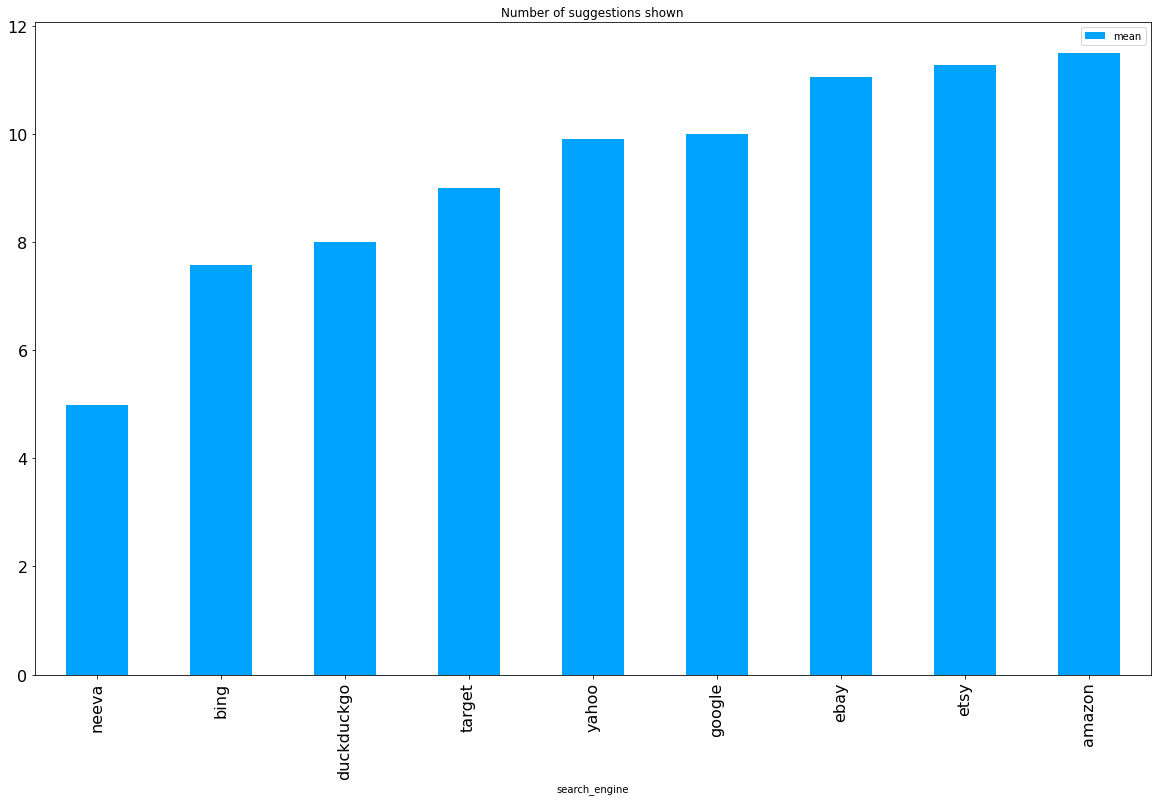

In [6]:
avg_num_suggestions.plot(kind='bar', title='Number of suggestions shown', y='mean', figsize=(20,12), fontsize=16, color=['#00a3fe'])

# Number of Words

In [29]:
df['num_words'].agg(['mean'])

mean    2.724956
Name: num_words, dtype: float64

In [33]:
df.groupby(['category'])['num_words'].agg(['mean'])

,mean
category,
ecom,3.023521
web,2.512430


In [16]:
avg_num_words = df.groupby(['search_engine'])['num_words'].agg(['mean']).sort_values('mean')
avg_num_words

,mean
search_engine,
duckduckgo,2.033163
neeva,2.286307
etsy,2.462567
bing,2.515152
yahoo,2.727835
google,2.791837
amazon,3.073333
target,3.128405
ebay,3.521739


<AxesSubplot:title={'center':'Number of words shown'}, xlabel='search_engine'>

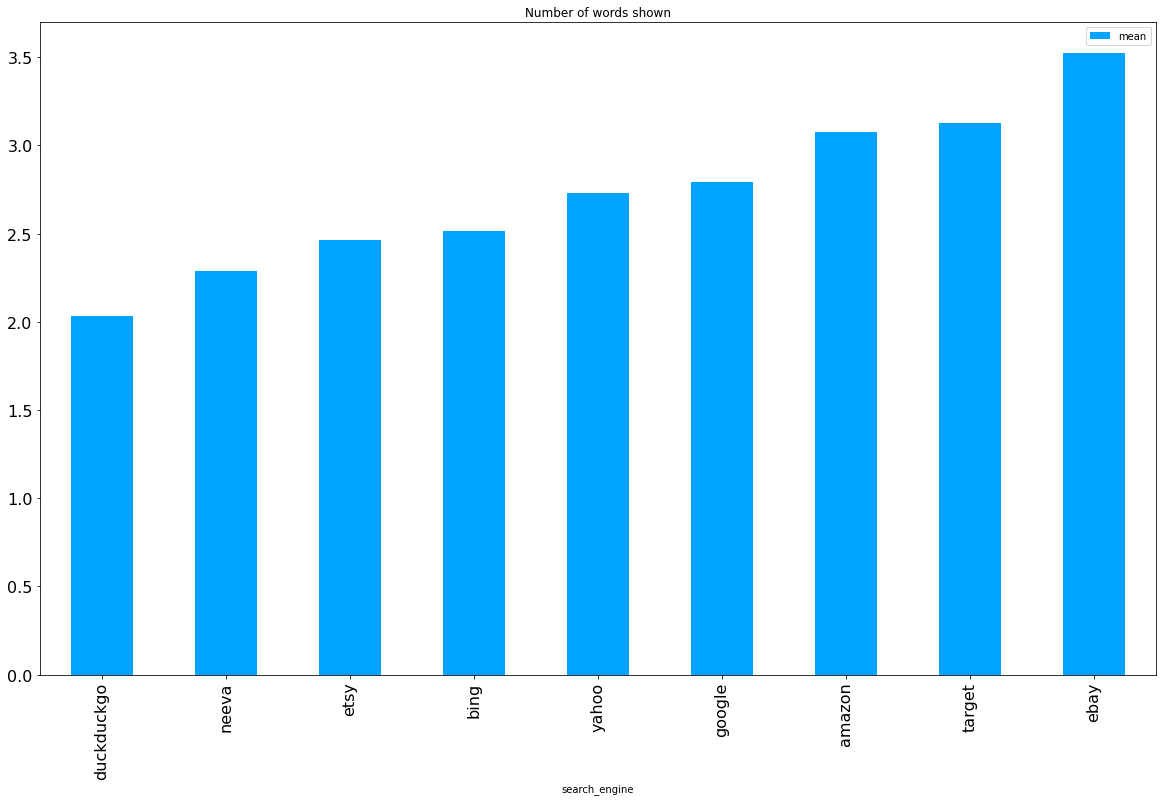

In [17]:
avg_num_words.plot(kind='bar', title='Number of words shown', y='mean', figsize=(20,12), fontsize=16, color=['#00a3fe'])

# How many characters?

In [28]:
df['num_characters'].agg(['mean'])

mean    17.089212
Name: num_characters, dtype: float64

In [34]:
df.groupby(['category'])['num_characters'].agg(['mean'])

,mean
category,
ecom,18.298646
web,16.228311


In [19]:
avg_num_chars = df.groupby(['search_engine'])['num_characters'].agg(['mean']).sort_values('mean')
avg_num_chars

,mean
search_engine,
duckduckgo,12.793367
neeva,14.568465
etsy,15.895722
bing,16.011019
google,17.630612
target,17.828794
yahoo,18.575258
amazon,18.835556
ebay,20.714286


<AxesSubplot:title={'center':'Number of characters'}, xlabel='search_engine'>

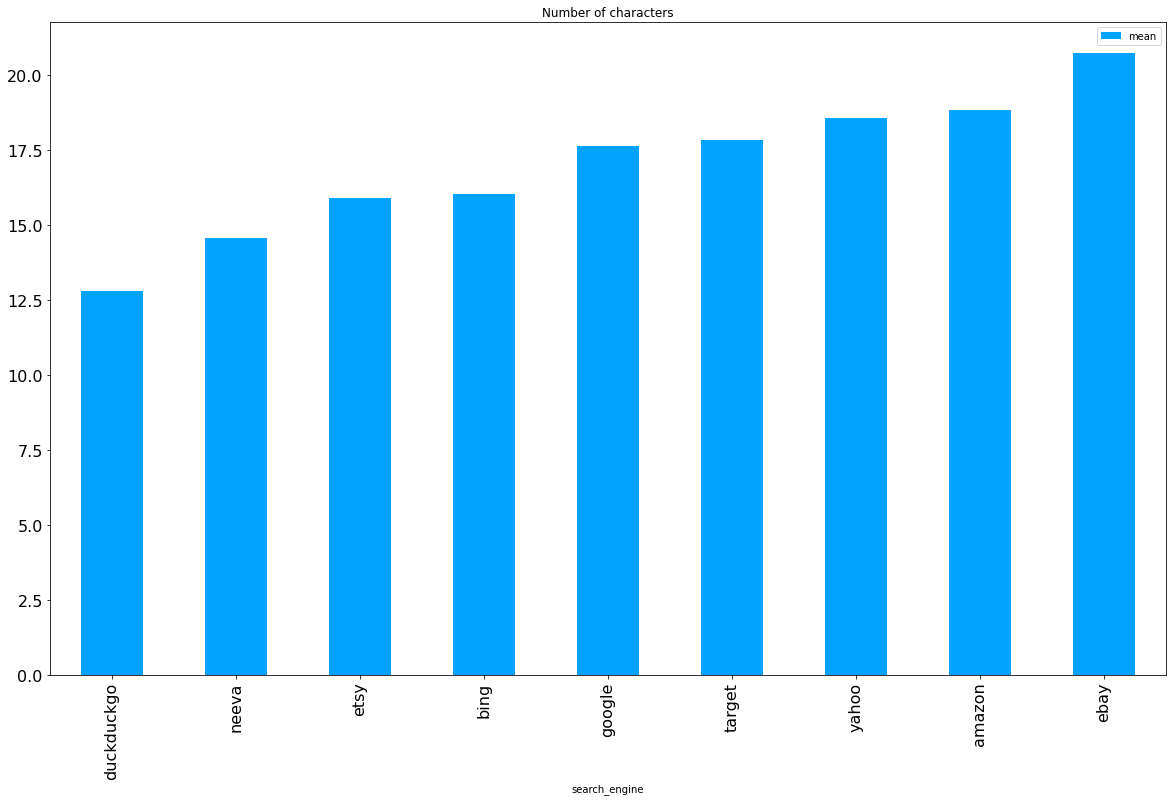

In [20]:
avg_num_chars.plot(kind='bar', title='Number of characters', y='mean', figsize=(20,12), fontsize=16, color=['#00a3fe'])

# How tall should a suggestion be?

In [27]:
df['height'].agg(['mean'])

mean    34.860996
Name: height, dtype: float64

In [35]:
df.groupby(['category'])['height'].agg(['mean'])

,mean
category,
ecom,37.16536
web,33.22070


In [22]:
avg_suggestion_height = df.groupby(['search_engine'])['height'].agg(['mean']).sort_values('mean')
avg_suggestion_height

,mean
search_engine,
duckduckgo,28.000000
yahoo,32.494845
google,32.722449
ebay,34.170807
etsy,34.609626
amazon,35.244444
bing,36.000000
neeva,40.000000
target,48.000000


<AxesSubplot:title={'center':'How tall should a suggestion be? (px)'}, xlabel='search_engine'>

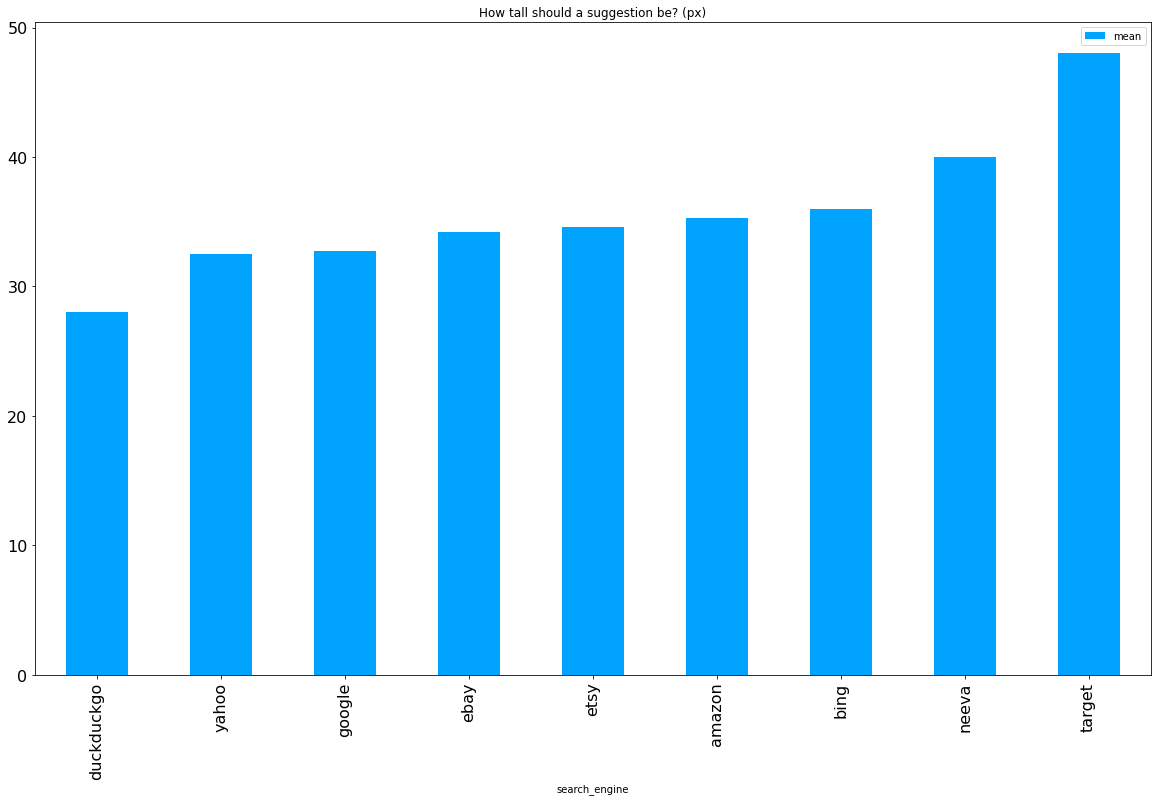

In [24]:
avg_suggestion_height.plot(kind='bar', title='How tall should a suggestion be? (px)', y='mean', figsize=(20,12), fontsize=16, color=['#00a3fe'])